In [72]:
%load_ext autoreload
%autoreload 2

import matplotlib 
import matplotlib.pyplot as plt
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from spherical import VisualizeKernel, VisualizeSphericalFunction
from functools import partial
import numpy as np
import torch
import e3nn
from e3nn.rs import dim, mul_dim
import e3nn.o3 as o3


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
from integrate_gaussian import parse_whole_basisfile, parse_whole_normfile

basis = lambda r, alpha, norm : norm * torch.exp(- alpha * r.unsqueeze(-1) **2)

alphaO, alphaH = parse_whole_basisfile('./density_data/a2.gbs')

## add in the duplicate entries for the SP basis functions
# oxygen
sp_duplicates = [item for item in alphaO if 'SP' in item]
last_index = max(idx for idx, val in enumerate(alphaO) if 'SP' in val)
alphaO[last_index+1:last_index+1] = sp_duplicates
#alphaO = np.array(alphaO)[:,0]
alphaO = torch.FloatTensor([item[0] for item in alphaO])
# hydrogen
sp_duplicates = [item for item in alphaH if 'SP' in item]
last_index = max(idx for idx, val in enumerate(alphaH) if 'SP' in val)
alphaH[last_index+1:last_index+1] = sp_duplicates
#alphaH = np.array(alphaH)[:,0]
alphaH = torch.FloatTensor([item[0] for item in alphaH])


## get normalization constants
normO, normH = parse_whole_normfile('./density_data/a2_norm.dat')
#normO = np.array(normO)
#normH = np.array(normH)
normO = torch.FloatTensor(normO)
normH = torch.FloatTensor(normH)

basis_on_r = partial(basis, alpha=alphaO, norm=normO)

Rs_out_O = [(8, 0), (4, 1), (4, 2)]
Rs_out_H = [(4, 0), (1, 1), (1, 2)]

assert mul_dim(Rs_out_O) == normO.shape[0]
assert mul_dim(Rs_out_H) == normH.shape[0]

In [99]:
vsf = VisualizeSphericalFunction(basis_on_r, Rs_out_O, o3.spherical_harmonics_xyz)
r, f = vsf.plot_data_on_grid(0.5, n=20)
i = 8
plot_max = float(f[:, i].abs().max())
#print(plot_max)
#print(f.shape)

In [100]:
fig = go.Figure(data=go.Volume(
    x=r[:,0],
    y=r[:,1],
    z=r[:,2],
    value=f[:, i].abs(),
    isomin=-plot_max,
    isomax=plot_max,
    #isomin=-30,
    #isomax=30,
    opacity=0.3, # needs to be small to see through all surfaces
    surface_count=50, # needs to be a large number for good volume rendering
    colorscale='RdBu'))
fig.show()

In [90]:
l0_norm = float(o3.spherical_harmonics_xyz(0, torch.zeros(3))[0])
print(l0_norm)

0.28209479177387814


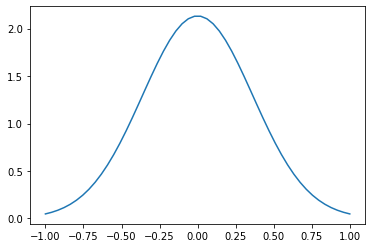

In [48]:
x = torch.linspace(-1.0, 1.0, 50)
y = basis_on_r(x).detach()
# y.shape
plt.plot(x, l0_norm * y[:, 9])

In [42]:
torch.max(y[:, 0])

tensor(256.9523)